In [80]:
import bt
import pandas as pd
import numpy as np

In [90]:
file_path = r'..\Data\OPCL_20000103_20201231.csv'
df = pd.read_csv(file_path)
df.set_index('ticker', inplace=True)
df.columns = pd.to_datetime(df.columns.str.lstrip('X'), format='%Y%m%d').strftime('%Y-%m-%d')
df = df.transpose()

df_cleaned = df.fillna(method="ffill", axis=0)
# df_cleaned = df.replace(0, np.NaN)
# df_cleaned = df.dropna(axis=1)
# df_cleaned = df.dropna().transpose
df_cleaned.index = pd.to_datetime(df_cleaned.index)

# replace 0 values with epsilon
# df_cleaned = df_cleaned.replace(0,1-e8)

print("Data loaded and cleaned. Sample (first 5 rows/cols):")
print(df_cleaned.iloc[0:10,0:10])

# df_cleaned = df_cleaned[['IBM']]

data = bt.get('spy,agg', start='2010-01-01')
# data = df_cleaned
# print(data.head())

Data loaded and cleaned. Sample (first 5 rows/cols):
ticker            AA       ABM       ABT       ADI       ADM       ADX  \
2000-01-03 -0.013042 -0.009188 -0.007117 -0.036071  0.000000 -0.001867   
2000-01-04  0.010043  0.012346 -0.012786 -0.044261  0.005277 -0.005666   
2000-01-05  0.047628 -0.006192  0.011111  0.014493 -0.015915  0.000000   
2000-01-06 -0.011713  0.000000  0.032553 -0.027719  0.010695  0.005742   
2000-01-07 -0.016118  0.003091  0.028573  0.033654  0.005249  0.003810   
2000-01-10 -0.032073  0.000000 -0.021053  0.048129 -0.005222  0.003810   
2000-01-11  0.022608 -0.009302  0.010850 -0.031921 -0.015831  0.009443   
2000-01-12 -0.005249  0.003130 -0.021779  0.034686  0.020943  0.001885   
2000-01-13 -0.018210 -0.028619 -0.009217 -0.020443  0.000000  0.007533   
2000-01-14 -0.020109  0.012423  0.000000  0.057086  0.030459  0.005634   

ticker           AEE       AEG       AEM       AEP  
2000-01-03 -0.007707  0.014739 -0.008658 -0.017734  
2000-01-04  0.000000 -0.01

C:\Users\niloz\AppData\Local\Temp\ipykernel_53256\4219401991.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method="ffill", axis=0)


In [102]:
len(df_cleaned.columns)

695

In [100]:
# print(df_cleaned)
# print(df_cleaned.index)
def check_df(df):
    # has_nans = df_cleaned.isna().any().any()
    # print("Any NaNs in dataframe?", has_nans)

    # has_zeros = (df_cleaned == 0).any().any()
    # print("Any zero prices?", has_zeros)

    zero_indices = (df==0).any(axis=1)
    # print(zero_indices)
    print("num zeros: ", zero_indices.sum())

    na_indices = df.isna().any(axis=1)
    # print(na_indices)
    print("num na: ", na_indices.sum())

    print("overall length: ", len(df))


In [101]:
print("bt test data: ")
check_df(data)
print("---------------------------------------------------------")
print("raw OPCL data: ")
check_df(df)
print("---------------------------------------------------------")
print("cleaned OPCL data: ")
check_df(df_cleaned)


bt test data: 
num zeros:  0
num na:  0
overall length:  3878
---------------------------------------------------------
raw OPCL data: 
num zeros:  5275
num na:  1038
overall length:  5279
---------------------------------------------------------
cleaned OPCL data: 
num zeros:  5275
num na:  1015
overall length:  5279


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\niloz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\niloz\AppData\Local\Programs\Python\Python311\Lib\site-packages\ffn\core.py:1358: RuntimeWarning: invalid value encountered in scalar power
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1
100%|██████████| 1/1 [00:02<00:00,  2.30s/it]
c:\Users\niloz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\niloz\AppData\Local\Programs\Python\Python311\Lib\site-packages\ffn\core.py:1358: RuntimeWarning: invalid value encountered in scalar power
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1


Stat                 s1
-------------------  ----------
Start                2000-01-02
End                  2020-12-31
Risk-free rate       0.00%

Total Return         -168.65%
Daily Sharpe         0.79
Daily Sortino        1.63
CAGR                 -
Max Drawdown         -282.87%
Calmar Ratio         -

MTD                  -16.61%
3m                   -5.41%
6m                   7.22%
YTD                  -1.08%
1Y                   -1.08%
3Y (ann.)            -3.97%
5Y (ann.)            -2.62%
10Y (ann.)           0.02%
Since Incep. (ann.)  -

Daily Sharpe         0.79
Daily Sortino        1.63
Daily Mean (ann.)    385.89%
Daily Vol (ann.)     486.68%
Daily Skew           16.70
Daily Kurt           870.49
Best Day             1374.51%
Worst Day            -643.16%

Monthly Sharpe       0.02
Monthly Sortino      0.03
Monthly Mean (ann.)  1.50%
Monthly Vol (ann.)   61.30%
Monthly Skew         -3.60
Monthly Kurt         41.40
Best Month           73.45%
Worst Month          -177.80%



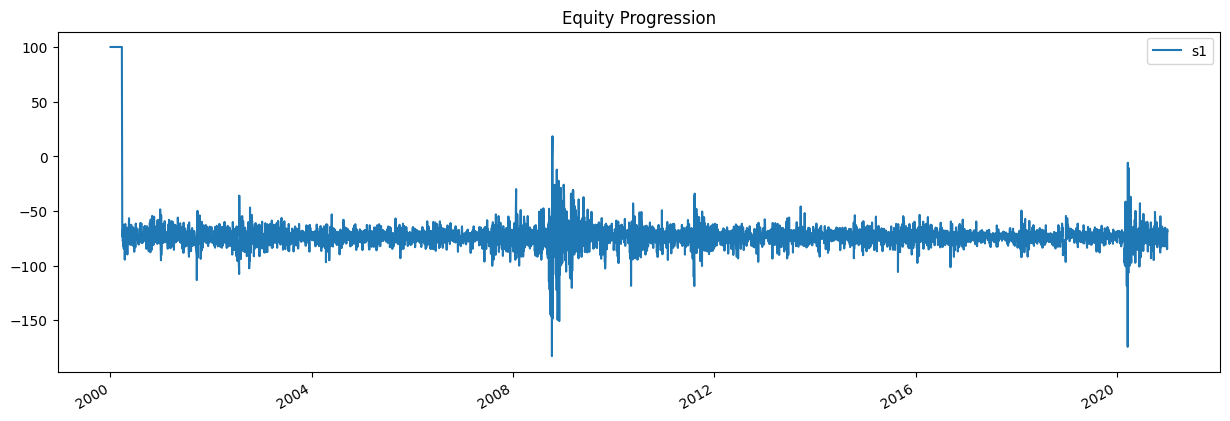

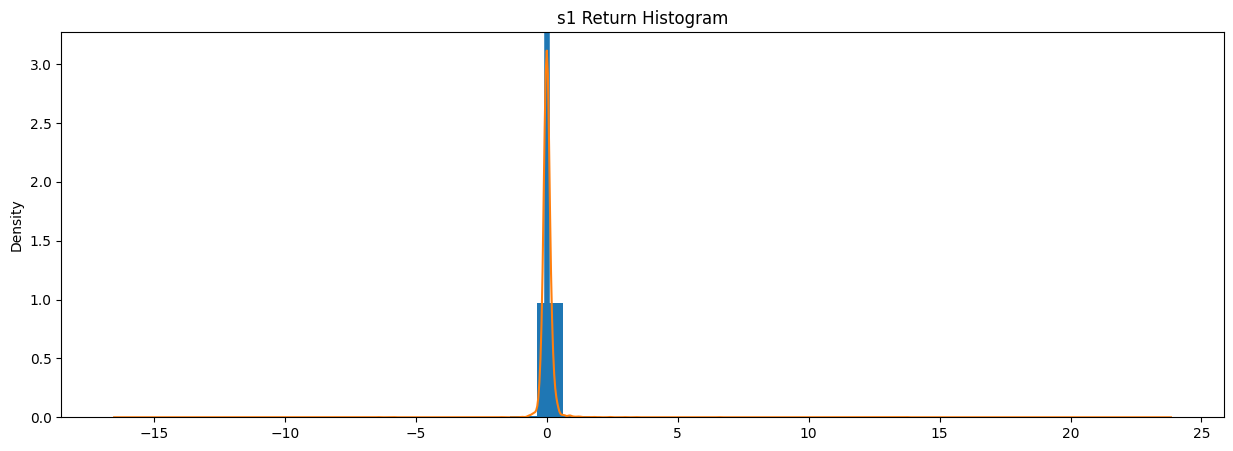

In [99]:
# strategy = bt.Strategy('s1', [bt.algos.RunMonthly(),
#                               bt.algos.SelectHasData(),
#                             #   bt.algos.SelectAll(),
#                               bt.algos.WeighEqually(),
#                               bt.algos.CloseDead(),
#                               bt.algos.Rebalance()])
# test = bt.Backtest(strategy, df_cleaned)
# res = bt.run(test)
# res.plot()
# res.display()
# res.plot_histogram()
# # res.plot_security_weights()


strategy = bt.Strategy('s1',[bt.algos.RunDaily(),                       # Run the logic daily
                             bt.algos.SelectAll(),                      # Consider all securities
                             bt.algos.SelectHasData(),                  # Only select those with data on the current date
                             bt.algos.WeighEqually(),
                             bt.algos.CloseDead(),                   # Equal weight among selected
                             bt.algos.Rebalance(),                      # Rebalance to target weights
                            ])
test = bt.Backtest(strategy, df_cleaned)
res = bt.run(test)
res.plot()
res.display()
res.plot_histogram()
# res.plot_security_weights()



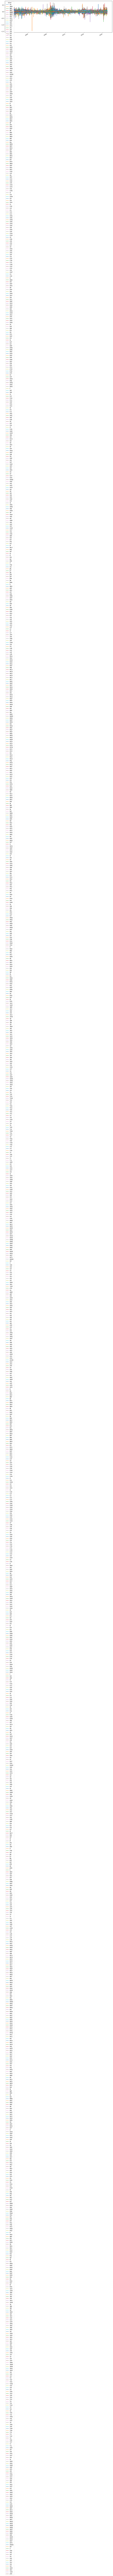

In [ ]:
sma = df_cleaned.rolling(50).mean()
plot = bt.merge(df_cleaned, sma).plot(figsize=(15, 5))

In [ ]:
has_nans = df_cleaned.isna().any().any()
print("Any NaNs in dataframe?", has_nans)

has_zeros = (df_cleaned == 0).any().any()
print("Any zero prices?", has_zeros)

Any NaNs in dataframe? False
Any zero prices? True
